## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [39]:
import pandas as pd


df = pd.read_csv('titanic.csv')


numeric_stats = df.describe()
print("Статистична інформація по числовим змінним:")
print(numeric_stats)


dataset_shape = df.shape
print("\nРозмірність датасету:")
print("Кількість рядків:", dataset_shape[0])
print("Кількість стовпців:", dataset_shape[1])


data_types_info = df.dtypes
data_count_info = df.count()
print("\nТипи змінних і кількість даних по кожній змінній:")
for col_name, dtype, count in zip(data_types_info.index, data_types_info.values, data_count_info.values):
    print(col_name + ":", dtype, "-", count, "данних")


print("\nПерші 5 рядків датасету:")
print(df.head())


Статистична інформація по числовим змінним:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Розмірність датасету:
Кількість рядк

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [40]:

missing_values_count = df.isnull().sum()
print("\nКількість пропущених значень по кожному атрибуту:")
print(missing_values_count)



Кількість пропущених значень по кожному атрибуту:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки:

 У 1 та 2 звданнях я перевіряю статистичну інформацію про числові змінні, кількість пропущених значень, а також переглядаю перші рядки даних, щоб отримати загальне уявлення про їх структуру та вміст

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



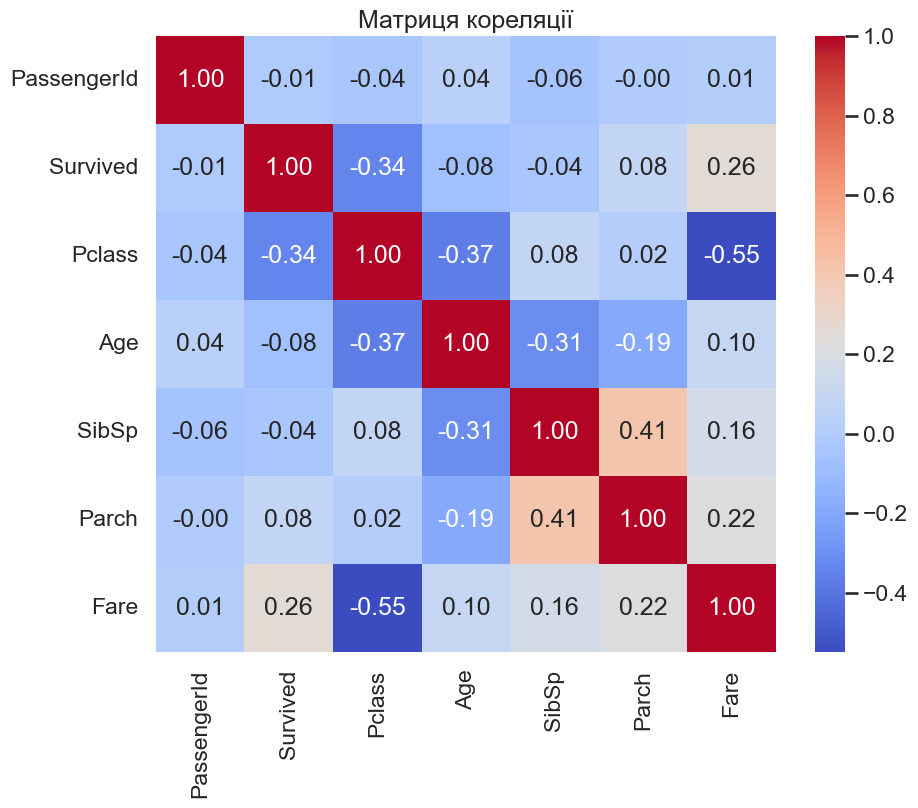

In [41]:

numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матриця кореляції')
plt.show()


Ваші висновки:
У цьому коді я побудувала матрицю кореляції для числових стовпців у наборі даних про пасажирів "Титаніка". Метод Пірсона дозволив розрахувати коефіцієнти кореляції між цими змінними, а теплокарта візуалізувала зв'язок між ними.

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [42]:
import pandas as pd

def fill_missing_by_group(df, column, group_columns):
    df[column] = df.groupby(group_columns)[column].transform(lambda x: x.fillna(x.median()))
    return df
filled_df = fill_missing_by_group(df, "Age", ["Sex", "Pclass"])


print(filled_df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки:

У цьому коді я створила функцію, щоб вирішити проблему з пропущеними значеннями у даних. Це важливо, щоб дані були готові для аналізу. Заповнення пропусків допомагає зберегти якнайбільше інформації без втрати даних.






 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





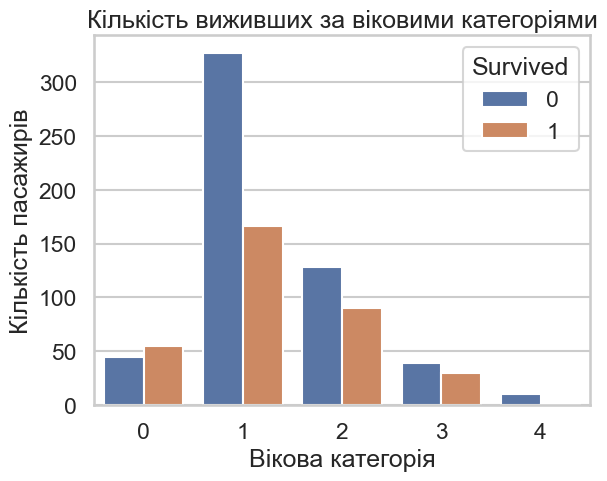

In [43]:
import numpy as np

bins = np.linspace(0, 80, 6)

df['Age_bin'] = pd.cut(df['Age'], bins, labels=[0, 1, 2, 3, 4], include_lowest=True)

import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='Age_bin', hue='Survived', data=df)
plt.xlabel('Вікова категорія')
plt.ylabel('Кількість пасажирів')
plt.title('Кількість виживших за віковими категоріями')
plt.legend(title='Survived', loc='upper right', labels=['0', '1'])
plt.show()


Ваші висновки:
У цьому коді я зробила рафік який показує, скільки людей вижило в кожній категорії віку. Це допомагає робити кращі висновки про вплив віку на шанси на виживання.

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

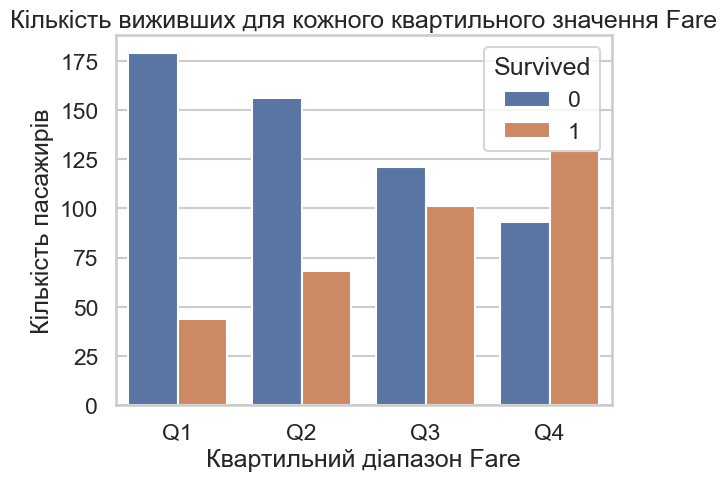

Кількість виживших пасажирів для кожного квартилю змінної fare:
Fare_bin
Q1     44
Q2     68
Q3    101
Q4    129
Name: Survived, dtype: int64


/var/folders/ds/f8dpwy517y386kvymrw8pj100000gn/T/ipykernel_91037/9230748.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_by_fare = df.groupby('Fare_bin')['Survived'].sum()


In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df['Fare_bin'] = pd.qcut(df['Fare'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])


sns.countplot(x='Fare_bin', hue='Survived', data=df)
plt.xlabel('Квартильний діапазон Fare')
plt.ylabel('Кількість пасажирів')
plt.title('Кількість виживших для кожного квартильного значення Fare')
plt.legend(title='Survived', loc='upper right', labels=['0', '1'])
plt.show()


survived_by_fare = df.groupby('Fare_bin')['Survived'].sum()
print("Кількість виживших пасажирів для кожного квартилю змінної fare:")
print(survived_by_fare)


Ваші висновки:
Тут я використовую функцію, щоб розділити ціни квитків на групи та показати, скільки людей вижило в кожній групі. А також порівнюю кількість виживших для кожної групи, щоб побачити, чи є різниця між ними.

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [45]:

df['Family_size'] = df['Parch'] + df['SibSp']
df['Alone'] = (df['Family_size'] == 0).astype(int)

print(df[['Family_size', 'Alone']].head())


   Family_size  Alone
0            1      0
1            1      0
2            0      1
3            1      0
4            0      1


Ваші висновки: Тут я створила нові змінні, Family_size та Alone, які дозволяють  краще розуміти динаміку сімейних відносин серед пасажирів "Титаніка".

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [69]:
import pandas as pd
df = pd.read_csv('titanic.csv')


df_cleaned = df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)
df_cleaned.to_csv('titanic_new.csv', index=False)


Ваші висновки: Я обрала саме ці атрибути оскільки PassengerId є лише унікальним ідентифікатором, який не має значення для аналізу, а Ticket та Cabin містять багато пропущених значень та не мають прямого зв'язку з виживанням пасажирів, я їх видалила з набору даних для полегшення подальшого аналізу та моделювання.

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [54]:
import pandas as pd

df = pd.read_csv('titanic.csv')
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


embarked_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_encoded], axis=1)
df.drop('Embarked', axis=1, inplace=True)


if 'Title' not in df.columns:
    df['Title'] = pd.Series(['Mr', 'Master', 'Mrs', 'Miss', 'Other'])
df['Title'] = df['Title'].map({'Mr': 0, 'Master': 1, 'Mrs': 2, 'Miss': 3, 'Other': 4})

print(df.head())




   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  Title  
0         A/5 21171   7.2500   NaN       False       False        True    0.0  
1          PC 17599  71.2833   C85        True       False       False    1.0  
2  STON/O2. 3101282   7.9250   NaN       False       Fal

Ваші висновки: У цьому коді змінні Sex, Embarked та Title були успішно перетворені в числові значення для подальшого використання в аналізі та моделюванні. Це дозволить легше враховувати ці характеристики у дослідженні залежності виживання пасажирів "Титаніка" від різних факторів.

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



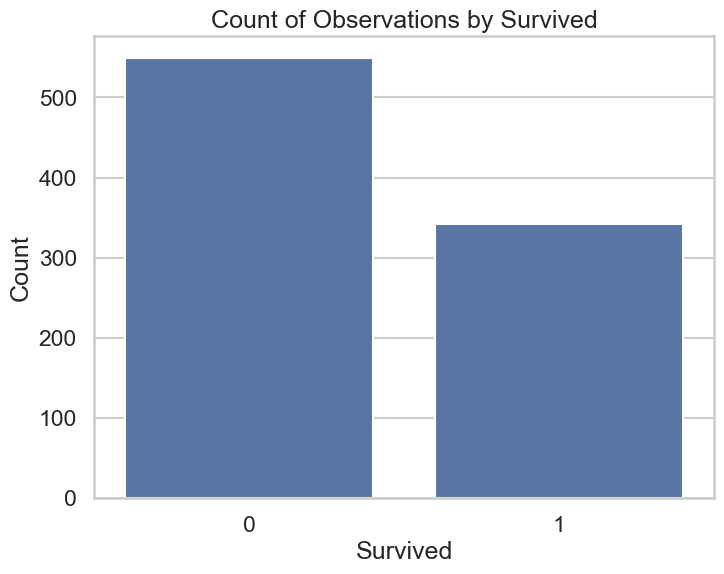

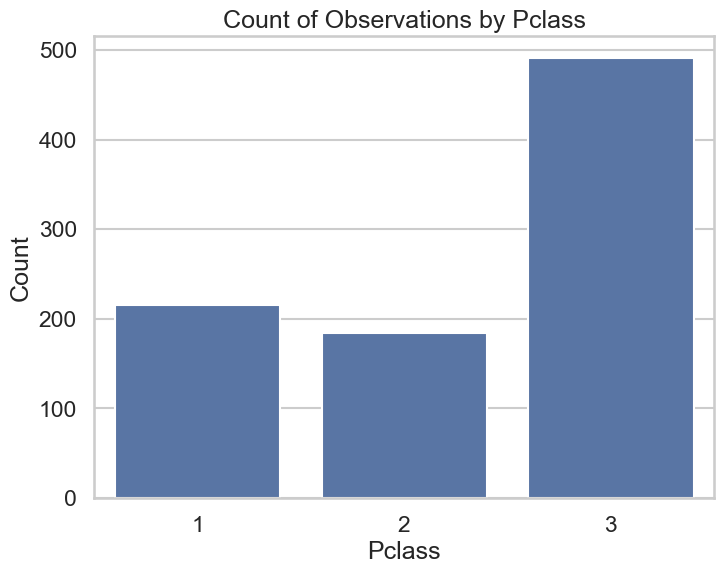

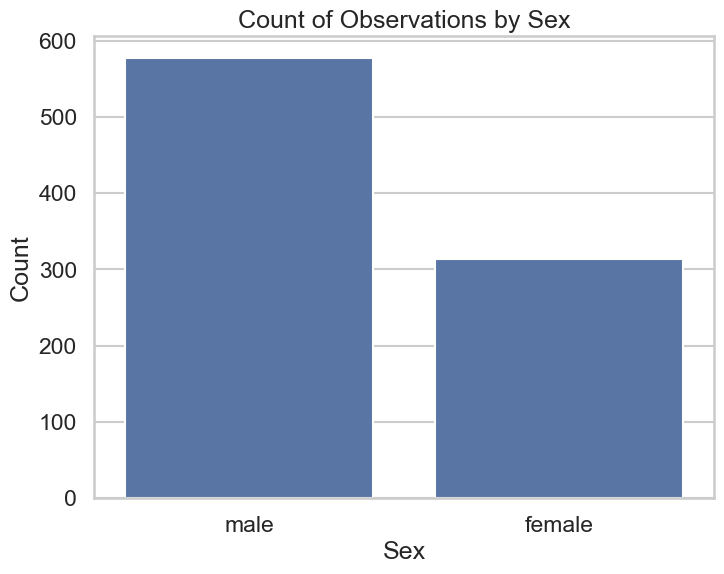

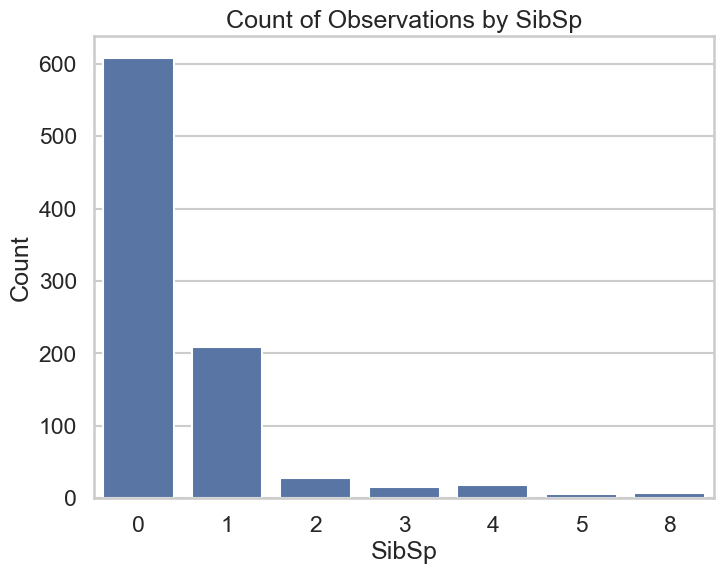

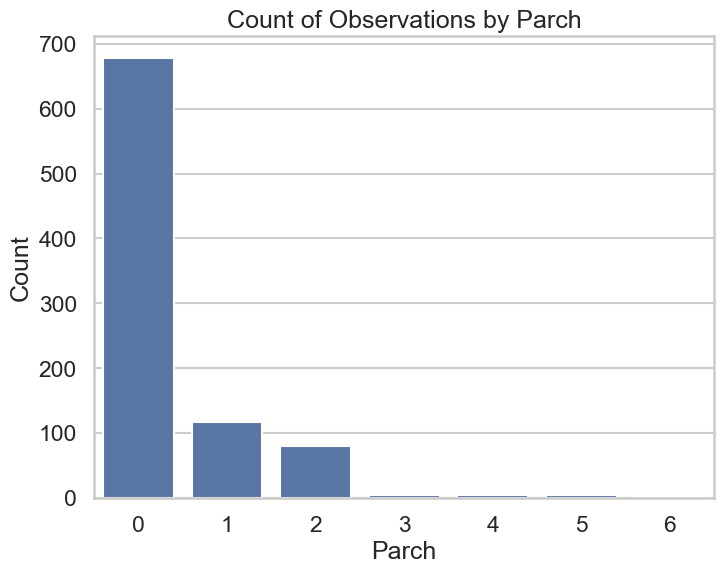

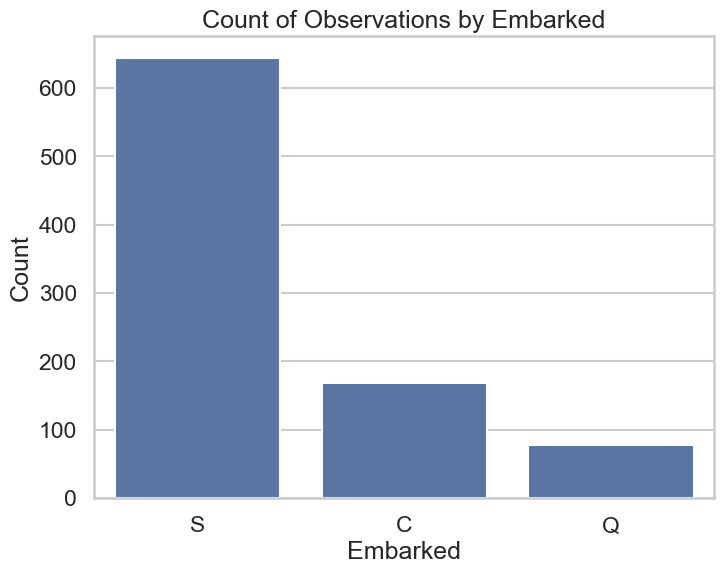

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')
categorical_vars = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']


for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=var)
    plt.title(f'Count of Observations by {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

Ваші висновки: У цьому коді я побудувала графіки кількості спостережень для кожної категоріальної змінної у наборі даних "Титанік", це дозволяє швидко оцінити розподіл кількості спостережень за кожною категорією змінної. 

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

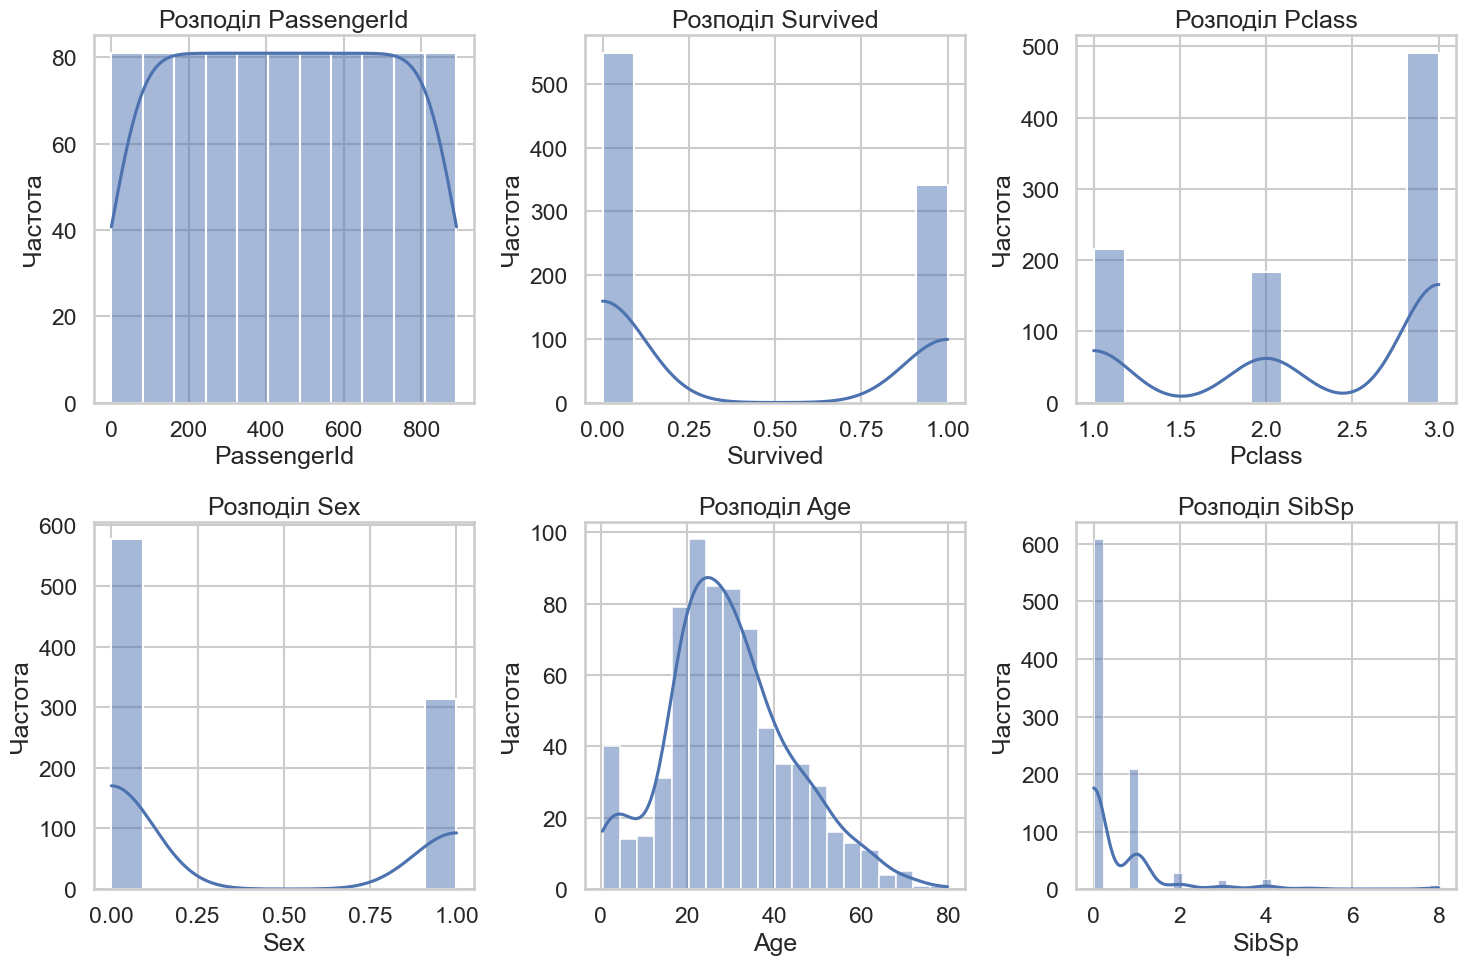

In [59]:

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns[:6]


plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Розподіл {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
plt.tight_layout()
plt.show()


Ваші висновки:
Цей код дає зрозуміти розподіл даних за категоріями та виявити можливість дисбалансу в обсязі даних між різними категоріями. Такий аналіз є важливим кроком у розумінні даних та підготовці їх для подальшого аналізу.








##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

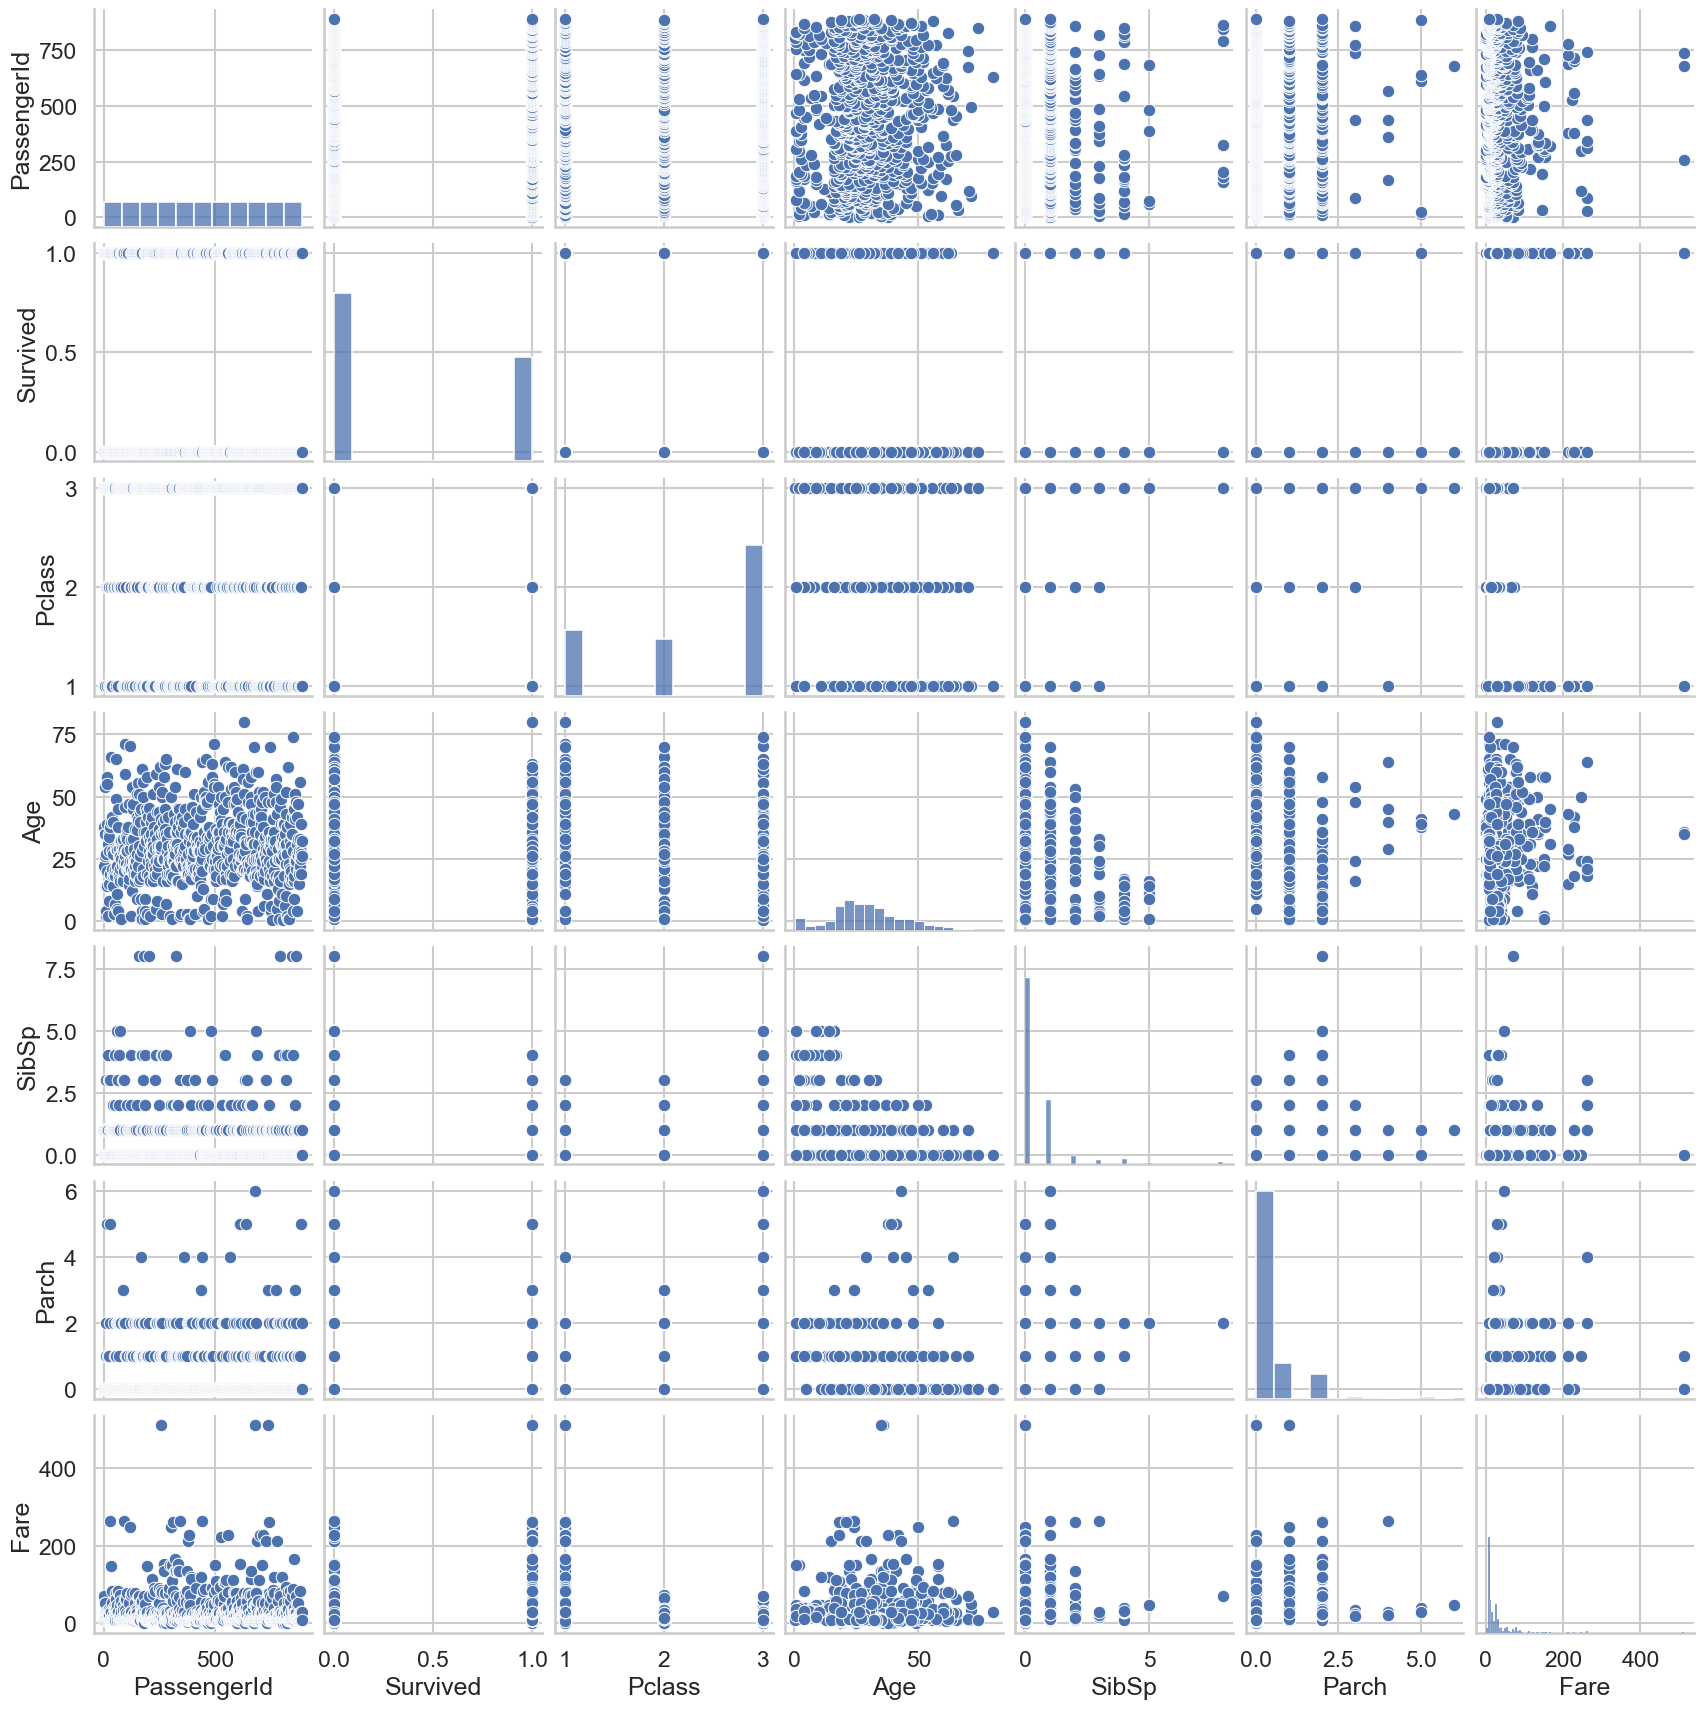

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')

numeric_cols = df.select_dtypes(include=['int64', 'float64'])

sns.pairplot(numeric_cols)
plt.show()


2. Отримані співвідношення показують, що вік, клас квитка та наявність родичів або дітей на борту можуть впливати на шанси на виживання пасажирів Титаніка. 

Ваші висновки:
На мою думку аналіз показав, що молоді та пасажири з вищим класом квитка мали більше шансів на виживання на "Титаніку".

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.